# Language localization for the FIFA videogame

![](Images/unsplash.jpg)
_Photo by JESHOOTS.COM on Unsplash_

> __Language localization__ _is the process of adapting a product's translation to a specific country or region. It is the second phase of a larger process of product translation and cultural adaptation (for specific countries, regions, cultures or groups) to account for differences in distinct markets, a process known as internationalization and localization. <br><br>
The localization process is most generally related to the cultural adaptation and translation of software, video games, and websites, as well as audio/voiceover, video, or other multimedia content, and less frequently to any written translation (which may also involve cultural adaptation processes). Localization can be done for regions or countries where people speak different languages or where the same language is spoken._

In this project we aim to find the best possible language to which translate next versions of [Electronic Arts](https://www.ea.com)'s videogame, __FIFA__.

For this, we don't have any official data but the specifications of the game and a full dataset of the attributes and skills of the players in the game. Apart from this, we will also employ a collection of Twitter tweets mentioning the game and with a [sentiment](https://en.wikipedia.org/wiki/Sentiment_analysis) score. This data, however, will be enough to come with an insightful conclusion about what would be a good language candidate for the future.

We start off by analyzing the languages already included in the game.

## 0. FIFA languages
---

According to the official site, [FIFA 20](https://www.ea.com/games/fifa/fifa-20) is currently playable in the following __21__ languages, with region-specific commentary provided:
> _Arabic, Czech, Danish, German (Germany), English (American), Spanish (Spain), Spanish (Mexico), French (France), Italian, Japanese, Korean, Dutch, Norwegian, Polish, Portuguese (Brazil), Portuguese (Portugal), Russian, Swedish, Turkish, Chinese (simplified), Chinese (traditional)._ 

However, this is only a small set of the worldwide player's languages. And thus, one of the goals for [Electronic Arts (EA)](https://www.ea.com) in the near future would be adding new languages to upcoming versions of the video game for countries where it is (or it may be) highly played.

Given that we don't have official statistical data for the playability of the game, we need to make use of public datasets and social media data.

#### Countries/languages dataset

Along the analysis, we will need a relation of the languages spoken in each country. For this, we will load an already constructed dataset containing data of all the countries. The construction of this dataset is explained in ```Countries_dataset.ipynb```.

In [1]:
import pandas as pd

countries_lang = pd.read_csv('Countries/countries_lang_full.csv', index_col=0)
countries_lang.head()

,Country_name,Phone_code,Continent,Capital,Currency,Country_code,Languages
0,Andorra,376,Europe,Andorra la Vella,EUR,AND,Catalan
1,United Arab Emirates,971,Asia,Abu Dhabi,AED,ARE,Arabic
2,Afghanistan,93,Asia,Kabul,AFN,AFG,Pashto
3,Afghanistan,93,Asia,Kabul,AFN,AFG,Uzbek
4,Afghanistan,93,Asia,Kabul,AFN,AFG,Turkmen


Independently of the region, the languages already available in the FIFA 20 cover most of the countries in the world. To see this, we take ```countries_lang``` and filter the countries where the FIFA 20 languages are spoken:

In [2]:
langs_in_fifa20 = ['Arabic', 'Czech', 'Danish', 'German', 'English', 'Spanish', 
                   'French', 'Italian', 'Japanese', 'Korean', 'Dutch', 
                   'Norwegian', 'Polish', 'Portuguese', 'Russian', 'Swedish', 
                   'Turkish', 'Chinese']

# filter countries
countries_in_fifa20 = pd.DataFrame(columns=countries_lang.columns)
for lang in langs_in_fifa20:
    df = countries_lang[countries_lang.Languages==lang]
    countries_in_fifa20 = countries_in_fifa20.append(df, ignore_index=False)
countries_in_fifa20.reset_index(drop=True, inplace=True)

And show them on a map.

In [3]:
import plotly.express as px
import plotly.io as pio

# show countries in a map
# colors can be found in https://plotly.com/python/discrete-color/
fig = px.choropleth(countries_in_fifa20, locations="Country_code", 
                    hover_name="Country_name", color='Languages', 
                    scope='world', 
                    color_discrete_sequence=px.colors.qualitative.Light24)

fig.update_layout(
    title_text = "Countries covered by FIFA 20 languages",
    
    geo=dict(showframe=False, showcoastlines=False, 
             projection_type='equirectangular'),
    
    annotations = [dict(x=-0.04, y=0.0, xref='paper', yref='paper',
        text='Most countries in the world speak a language included ' \
                'in the FIFA 20 game.', showarrow = False)]
)

fig.update_geos(resolution=110, showcountries=False, 
                lataxis_range=[-55, 90], lonaxis_range=[-180, 180])

fig.show()
pio.write_html(fig, file='maps/countries_covered.html', auto_open=False)

/Users/hramirez/Library/Python/3.7/lib/python/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



We can see that except for the Balkanic area, the Southeast Asia, and a couple of other countries, most of the world is fairly covered. Therefore we would like to look into those countries left out and perhaps into second (or regional) languages spoken in the countries already covered.

We will start the analysis, by looking into the players dataset.

## 1. FIFA 20 dataset
---

The FIFA 20 players dataset can be obtained from this Kaggle [repository](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv). As the description states, the dataset contains:

* 100+ attributes
* URL of the scraped player
* Player positions, with the role in the club and in the national team
* Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.
* Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.

In [4]:
fifa20_data = pd.read_csv('FIFA data/players_20.csv', index_col=0)
fifa20_data.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


> We can see that the dataset contains 103 columns and 18278 entries (_i.e._, players).

In [5]:
fifa20_data.shape

(18278, 103)

In [6]:
fifa20_data.columns[:100]

Index(['player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
     

According to the repository, the data was scrapped from [SoFIFA](https://sofifa.com). Therefore, the first and second columns are the player's SoFIFA id and url respectively. 

Multiple kinds of analyses can be performed from this dataset. For the purposes of this analysis, however, we may only need a player's _nationality_ and _club_. Let's also keep the _short name_ for identification, and the _overall_ and _international reputation_ scores in case they provide some insights.

In [7]:
#%%time
import country_converter as coco

fifa20 = fifa20_data.copy()
fifa20 = fifa20[['short_name', 'nationality', 'club', 'overall', 
                 'international_reputation']]
fifa20.reset_index(drop=True, inplace=True)
fifa20.index.rename('id', inplace=True)

# change name to standard name
uk_countries = ['England', 'Scotland', 'Wales', 'Northern Ireland']
fifa20['nationality'] = fifa20.nationality.apply(lambda x: 'United Kingdom' 
                                                 if x in uk_countries else x)
fifa20['nationality'] = fifa20.nationality.apply(lambda x: 'Ireland' 
                                                 if x=='Republic of Ireland' 
                                                 else x)
nationalities = fifa20['nationality'].tolist()
fifa20['nationality'] = coco.convert(names=nationalities, to='name_short')
fifa20.columns = ['Name', 'Nationality', 'Club', 'Score', 
                  'International_reputation']
fifa20.head(10)

,Name,Nationality,Club,Score,International_reputation
id,,,,,
0,L. Messi,Argentina,FC Barcelona,94,5
1,Cristiano Ronaldo,Portugal,Juventus,93,5
2,Neymar Jr,Brazil,Paris Saint-Germain,92,5
3,J. Oblak,Slovenia,Atlético Madrid,91,3
4,E. Hazard,Belgium,Real Madrid,91,4
5,K. De Bruyne,Belgium,Manchester City,91,4
6,M. ter Stegen,Germany,FC Barcelona,90,3
7,V. van Dijk,Netherlands,Liverpool,90,3
8,L. Modrić,Croatia,Real Madrid,90,4


Notice that along the way, we cleaned the ```Nationality``` field using [country converter](https://pypi.org/project/country-converter/) by setting the countries standard name.

Now, one of the key thoughts in this analysis is that __the more popular a player is, the more representative he would be for a country__. In other words, a country with more good players would influence more playability of the game. Take Croatia for example, in the last worldcup they finished second with a team of well-recognized players; it would make sense that this fact influence the playability of the game across the country, and that perhaps Croatian is a language we are looking for.

We have the international reputation field to measure this influence. However, first we will need to add a language field to the data.

### 1.1 Adding languages
---

We will now extend the dataframe by adding a _Languages_ column taken from the ```countries_lang``` dataset from above.

In [8]:
union = fifa20.merge(countries_lang, how='left', left_on='Nationality', 
                     right_on='Country_name')
fifa20_langs = union.drop(['Country_name', 'Phone_code', 'Continent', 'Capital', 
                           'Currency', 'Country_code'], axis=1)
fifa20_langs.head(10)

,Name,Nationality,Club,Score,International_reputation,Languages
0,L. Messi,Argentina,FC Barcelona,94,5,Spanish
1,L. Messi,Argentina,FC Barcelona,94,5,Guarani
2,Cristiano Ronaldo,Portugal,Juventus,93,5,Portuguese
3,Neymar Jr,Brazil,Paris Saint-Germain,92,5,Portuguese
4,J. Oblak,Slovenia,Atlético Madrid,91,3,Slovenian
5,E. Hazard,Belgium,Real Madrid,91,4,Dutch
6,E. Hazard,Belgium,Real Madrid,91,4,French
7,E. Hazard,Belgium,Real Madrid,91,4,German
8,K. De Bruyne,Belgium,Manchester City,91,4,Dutch
9,K. De Bruyne,Belgium,Manchester City,91,4,French


> Notice that the dataframe maintains the duplicated-row basis of ```countries_lang``` due to the fact that several languages may be spoken in one country.

Let's now do an EDA to see the different languages the players speak and by how much.

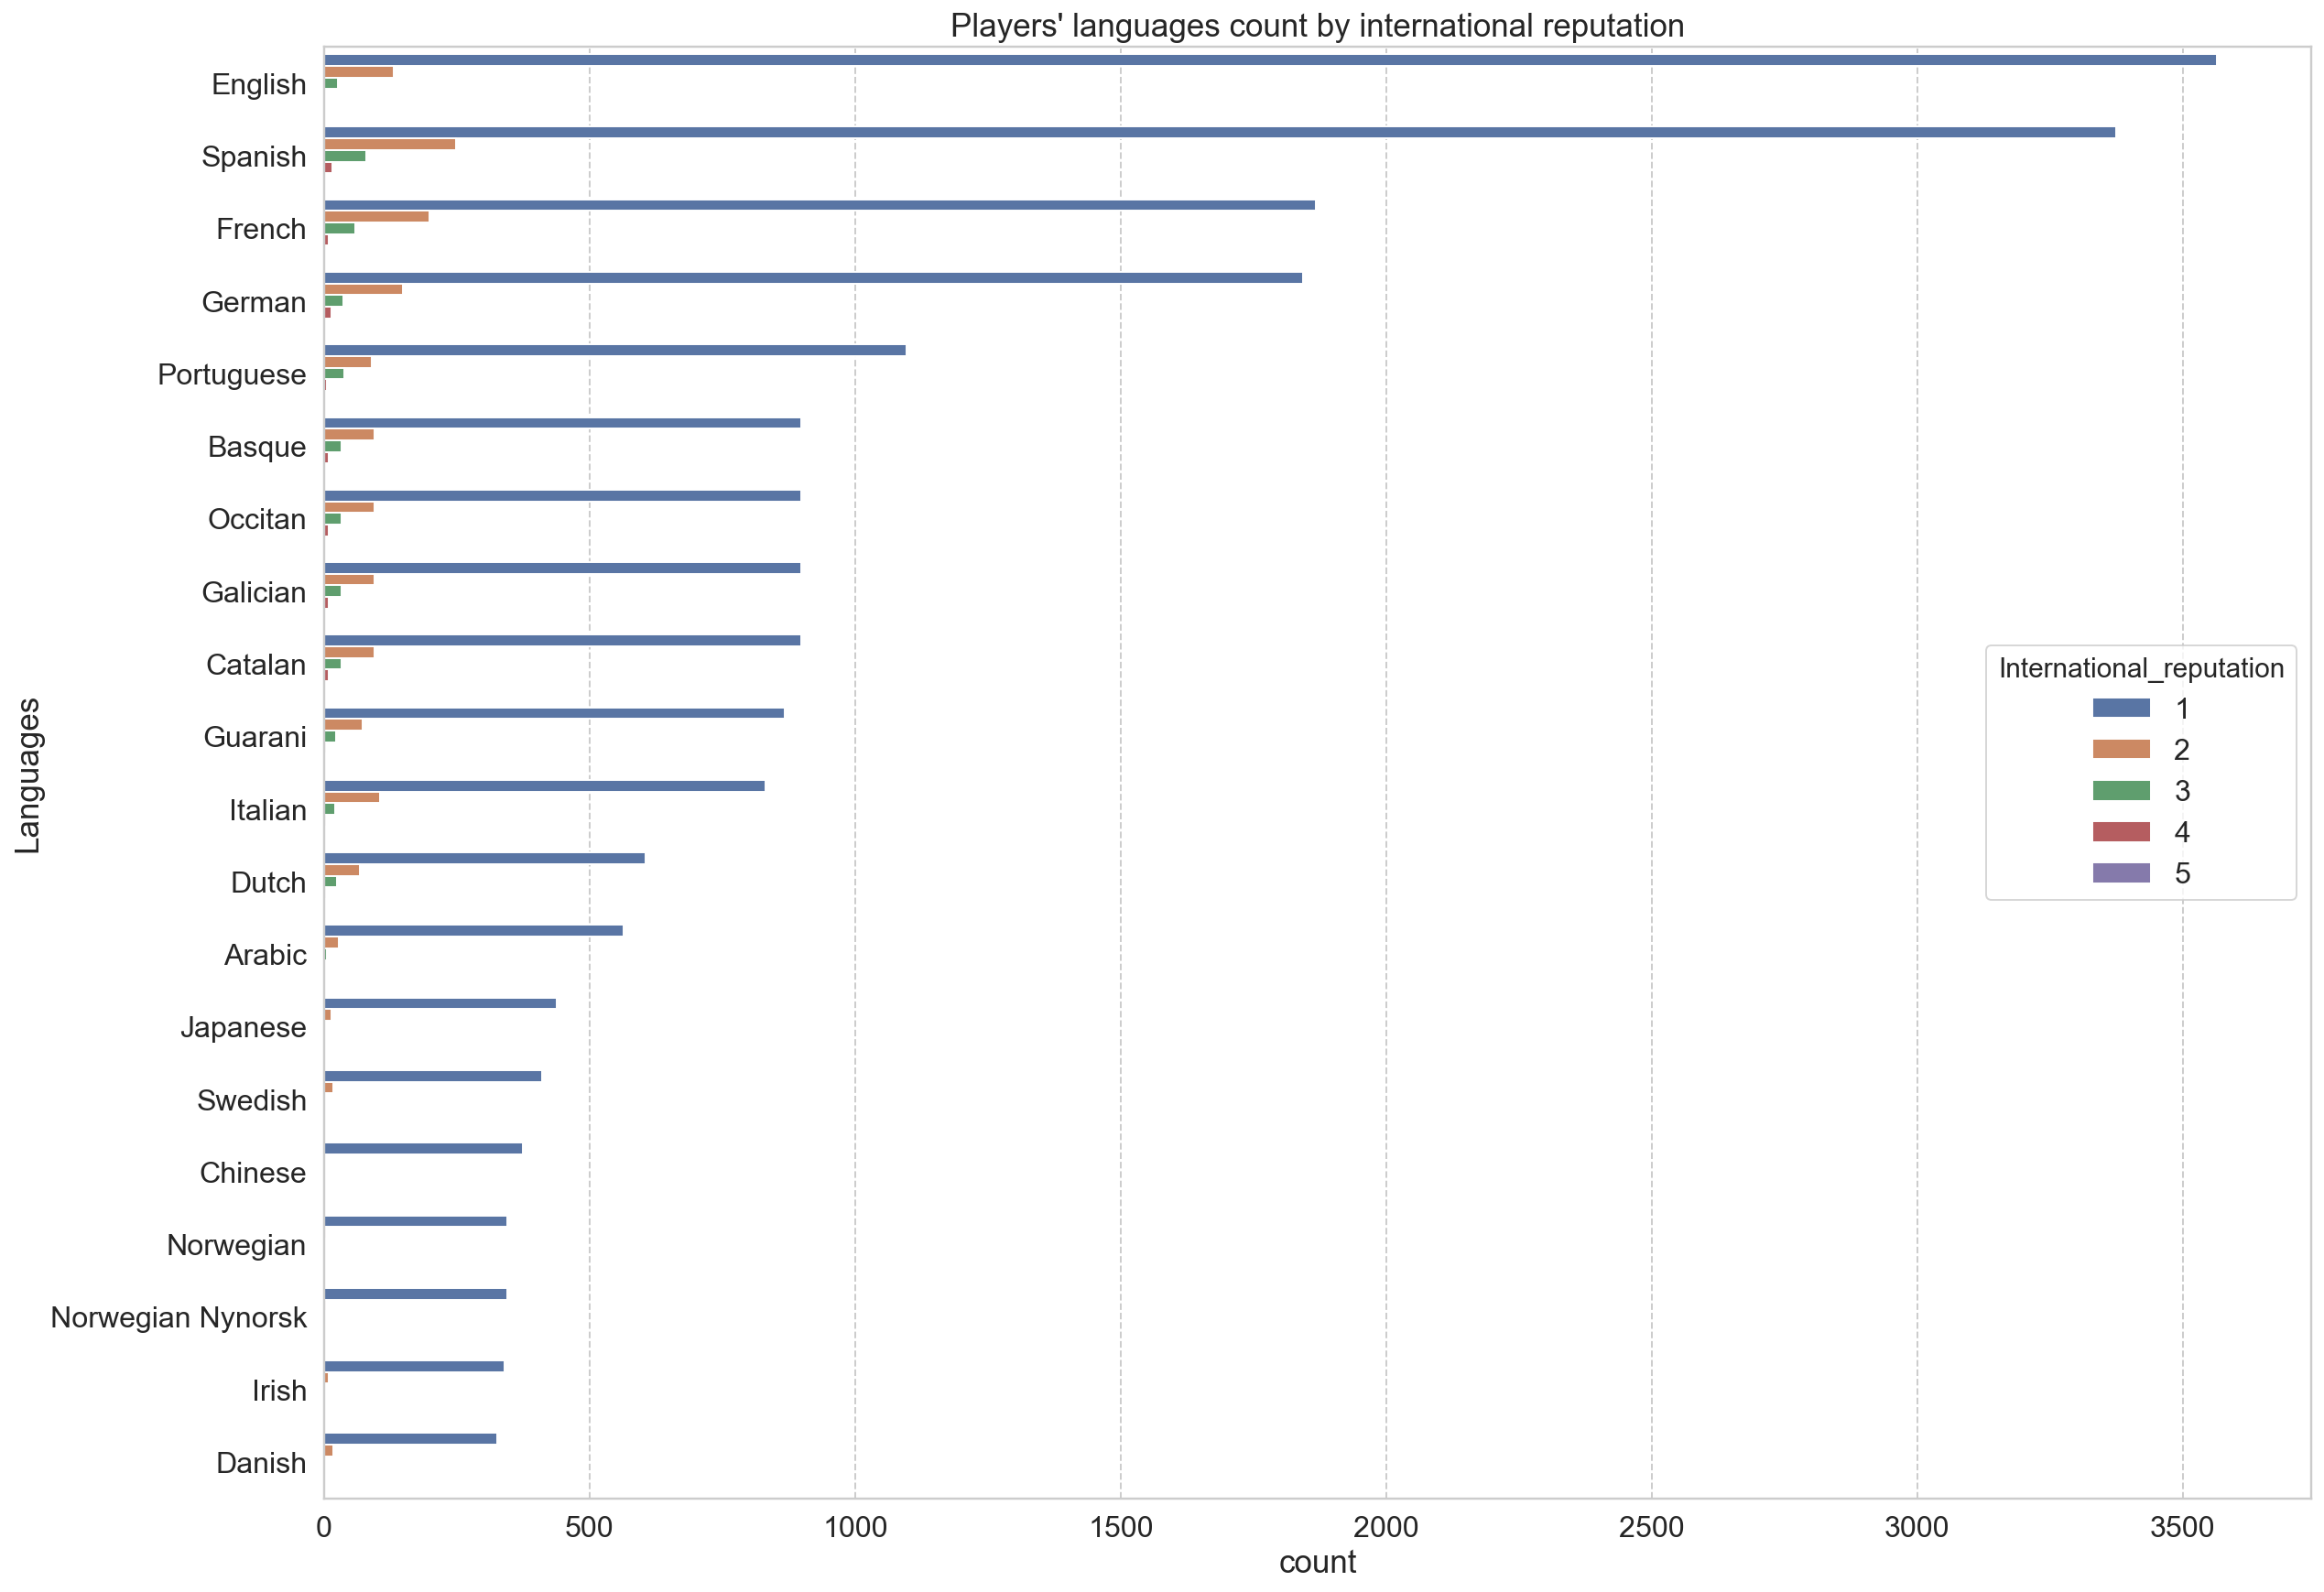

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
#
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
custom_style = {
            'grid.color': '0.8',
            'grid.linestyle': '--',
            'grid.linewidth': 0.5,
            'font.size': 1.5
}
sns.set_style(custom_style)
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 140
#

count = fifa20_langs.Languages.value_counts().index
number_of_countries = 20

#std_colors = sns.color_palette()
plt.figure(figsize=(20,15))

ax = sns.countplot(y='Languages', hue='International_reputation', 
                   data=fifa20_langs, # color=std_colors[0], 
                   order=count[:number_of_countries])
ax.set_title("Players' languages count by international reputation")
# plt.savefig('Images/fifa20_langs.png')
plt.show()

And now, removing the languages already included in the game:

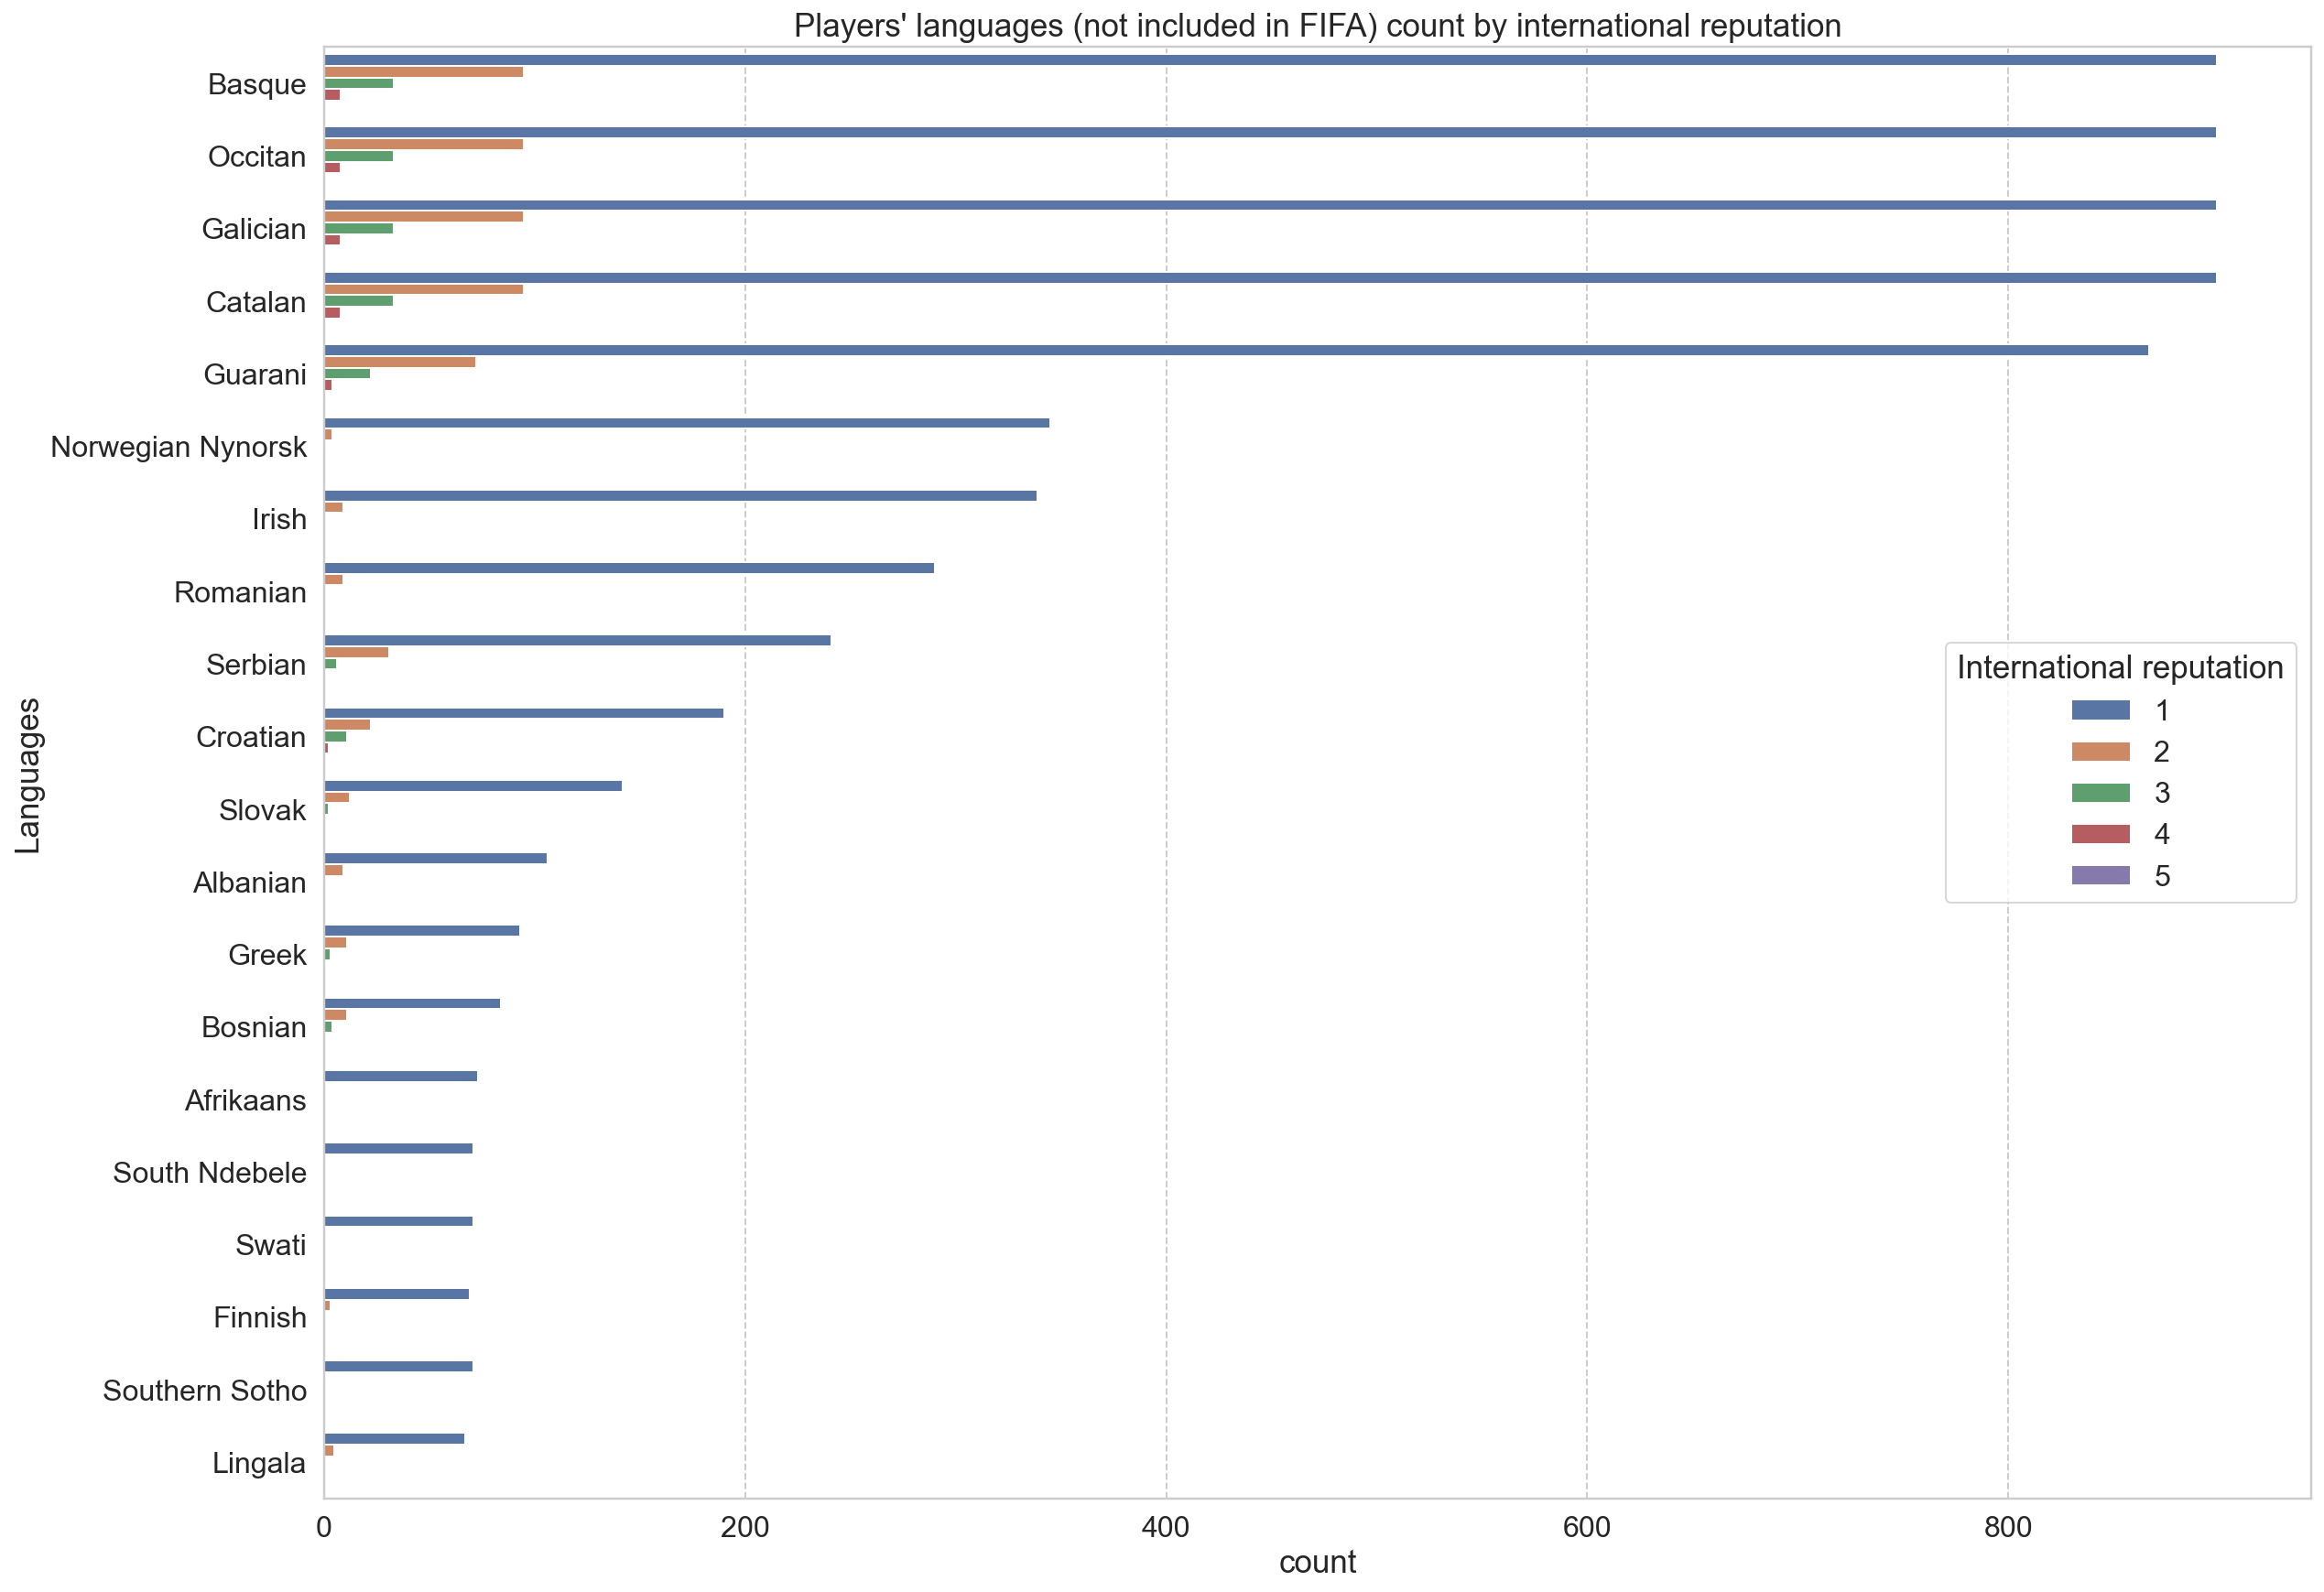

In [10]:
count = fifa20_langs.Languages.value_counts().index
count = [x for x in count if x not in langs_in_fifa20] # remove langs in game
#
number_of_countries = 20
#std_colors = sns.color_palette()
plt.figure(figsize=(20,15))
#
ax = sns.countplot(y='Languages', hue='International_reputation', 
                   data=fifa20_langs,# color=std_colors[1], 
                   order=count[:number_of_countries])
ax.set_title("Players' languages (not included in FIFA) count by international reputation")
plt.legend(title='International reputation', loc='center right')
# plt.savefig('Images/fifa20_nolangs.png')
plt.show()

Now, several comments are in order: 

> * First, we are assuming that all Spanish players speak Basque, Catalan, and Galician, which is clearly not true (and this is the same for a lot of more countries). In fact, Catalan (or Valencian) is spoken by 19%, Galician by 5%, and Basque by 2% of the population in Spain. [[Ref.](https://en.wikipedia.org/wiki/Languages_of_Spain)]
>
> * Occitan, spoken in Southern France, Monaco, Italy's Occitan Valleys, as well as Spain's Val d'Aran, has a range from 100,000 to 800,000 total native speakers. [[Ref.](https://en.wikipedia.org/wiki/Occitan_language)]
>
> * Guarani is an indigenous language of South America. It is one of the official languages of Paraguay, where it is spoken by the majority of the population. It is also spoken by communities in neighboring countries, including parts of northeastern Argentina, southeastern Bolivia and southwestern Brazil, and is a second official language of the Argentine province of Corrientes. It has 4.85 million (cited in 1995) native speakers though. [[Ref.](https://en.wikipedia.org/wiki/Guarani_language)]
>
> * Nynorsk is one of the two written standards of the Norwegian language. [[Ref.](https://en.wikipedia.org/wiki/Nynorsk)]
>
> * Although English is the more common first language elsewhere in Ireland, Irish is spoken as a first language in substantial areas. The official status of the Irish language remains high in the Republic of Ireland, and the total number of people who answered 'yes' to being able to speak Irish in April 2016 was 1,761,420, which represents 39.8 per cent of respondents out of a population of 4,921,500 (2019 estimate) in the Republic of Ireland. In Northern Ireland 104,943 identify as being able to speak Irish out of a population of 1,882,000 (2018 estimate). [[Ref.](https://en.wikipedia.org/wiki/Irish_language)]

Taking into account these facts, we will take the following considerations:

> * For Catalan speakers, we will only keep Spanish players playing in FC Barcelona, mainly due to their policy of teaching Catalan to their players. [[Ref.](https://www.spainforpleasure.com/2015/12/06/5-things-you-never-knew-about-fc-barcelona/)]
>
> * For Guarani speakers, we will only keep Paraguayan players as the language is spoken by the majority of the population alike in the rest of the countries.
>
> * We keep all Irish speakers.
>
> * We drop Basque, Galician, Occitan and Nynorsk.

And keep all the rest of languages with fewer speakers.

In [11]:
fifa20_short = fifa20_langs.copy()

# drop languages already in the game
for lang in langs_in_fifa20:
    fifa20_short = fifa20_short[fifa20_short.Languages!=lang]
    
# drop 'Basque', 'Galician', 'Occitan', 'Norwegian Nynorsk'
lang_todrop = ['Basque', 'Galician', 'Occitan', 'Norwegian Nynorsk']
for lang in lang_todrop:
    fifa20_short = fifa20_short[fifa20_short.Languages!=lang]

# keep Guarani only for Paraguayans
mask1 = fifa20_short.Nationality!='Paraguay'
mask2 = fifa20_short.Languages=='Guarani'
mask = fifa20_short[(mask1) & (mask2)].index
fifa20_short.drop(index=mask, inplace=True)

# remove all catalan speakers that do not play in FC Barcelona
mask3 = fifa20_short.Languages=='Catalan'
mask4 = fifa20_short.Club!='FC Barcelona'
mask = fifa20_short[(mask3) & (mask4)].index
fifa20_short.drop(index=mask, inplace=True)
#
fifa20_short.head()

,Name,Nationality,Club,Score,International_reputation,Languages
4,J. Oblak,Slovenia,Atlético Madrid,91,3,Slovenian
13,L. Modrić,Croatia,Real Madrid,90,4,Croatian
37,Sergio Busquets,Spain,FC Barcelona,89,4,Catalan
52,Piqué,Spain,FC Barcelona,88,4,Catalan
55,S. Handanovič,Slovenia,Inter,88,3,Slovenian


### 1.2 International reputation
---

In this part, we want to make an analysis of the players' __international reputation__ (IR) given their language.
> _International Reputation, also known as International Recognition, is an attribute that affects the player’s rating according to his club’s local and international prestige. It is based essentially on the popularity, history and results of them both. Basically, IR was created in order to adjust the players’ rating relatively to everything that doesn’t actually have to do with his technical, physical and mental capacities. It converges artificially so that the players who have the most fans around the world always get the highest ratings, but in practice there is no real effect._ [[Ref.](https://www.fifauteam.com/fifa-18-player-ratings-guide-ultimate-team/)]

We start by averaging the IR by each language. We also maintain a ```Count``` field which give the number of player in the dataset belonging to the language.

In [12]:
fifa_count = fifa20_short.copy()

# find average IR by language
agg = {'Name': 'count', 'International_reputation': 'mean'}
fifa_count = fifa_count.groupby('Languages').agg(agg)
fifa_count.sort_values(by='International_reputation', ascending=False, 
                       inplace=True)
fifa_count = fifa_count.rename(columns={'Name':'Count'})

fifa_count.head(12)

,Count,International_reputation
Languages,,
Catalan,15,1.666667
Sango,4,1.250000
Kirundi,4,1.250000
Slovenian,61,1.229508
Croatian,225,1.222222
Bosnian,99,1.191919
Hungarian,35,1.171429
Estonian,6,1.166667
Greek,107,1.158879


And so we finally came to a relation of the languages not included yet in the video game which are ordered by the player's mean international reputation. Looking at it, we could safely disregard Sango and Kirundi given the low sample count which clearly can introduce a bias. On the other hand, we can conclude that __Catalan__, __Slovenian__, __Croatian__, __Bosnian__ and __Hungarian__ are the most prominent languages 

> _Catalan players are well known internationally and could influence the playability of the game in the region. The same applies for the Balkanic countries Slovenia, Croatia and Bosnia._

Let's make a final visualization by localizing these languages in a map.

In [13]:
""" This block assigns a country name and code to the Languages according to
    where the language is spoken the most. """

# sort languages by speakers number
fifa_rep_countries = fifa20_langs.groupby(['Languages', 'Nationality']).count()
fifa_rep_countries.reset_index(inplace=True)
fifa_rep_countries.sort_values(by='Name', ascending=False, inplace=True)

# get countries for each language in number-of-speakers order
fifa_rep = fifa_count.copy()
fifa_rep.reset_index(inplace=True)

countries = []
for lang in fifa_rep.Languages:
    nat = fifa_rep_countries[fifa_rep_countries.Languages==lang]['Nationality']
    countries.append(nat.values[0])
fifa_rep['Countries'] = countries

# get codes
codes = []
for count in fifa_rep.Countries:
    code = countries_lang[countries_lang.Country_name==count]['Country_code']
    codes.append(code.values[0])
fifa_rep['Codes'] = codes

# normalize International_reputation in [0,1]
fifa_rep['International_reputation'] = (fifa_rep['International_reputation'] \
                                        - 1) / 0.666667

# drop entries with less than 15 counts
fifa_rep = fifa_rep[fifa_rep['Count']>=15]

In [14]:
fig = px.choropleth(fifa_rep, locations="Codes", 
                    color='International_reputation', #range_color=(0.5, 1)
                    hover_name="Languages", hover_data=['Countries', 'Count'], 
                    color_continuous_scale="Reds", scope='world') 

fig.update_layout(
    title_text = "Players' international reputation by languages not " \
                    "included in FIFA",
    
    geo=dict(showframe=False, showcoastlines=False, 
             projection_type='equirectangular'),
    
    annotations = [dict(x=-0.04, y=0.95, xref='paper', yref='paper',
        text='Reputation normalized [0,1]. Language assigned to the ' \
                'country where it is spoken the most.', showarrow = False),
                  
                  dict(x=-0.04, y=0.0, xref='paper', yref='paper',
        text='Catalan, Slovenian, Croatian, Bosnian and Hungarian are ' \
                'the most prominent languages for the game localization.', 
                       showarrow = False)]
)

fig.update_geos(resolution=110, showcountries=False, 
                lataxis_range=[-55, 90], lonaxis_range=[-180, 180])
fig.show()
pio.write_html(fig, file='maps/countries_IR.html', auto_open=False)

## 2. Twitter analysis
---

__In this second part, we perform a social media analysis to obtain insights about how well people talk about the video game.__ For this, we used ```Twitter/Twitter streamer.py``` to collect tweets mentioning the game. The tweet objects were then processed and cleaned as explained in ```Tweets processing and sentiment.ipynb```.

We collected __52830__ tweets over the course of several days containing the following keywords: __'#FIFA20'__, '__#FIFA21'__, __'FIFA20'__, __'FIFA21'__, __'FIFA 20'__, __'FIFA 21'__ and __'#EASPORTSFIFA'__. Each tweet comes with a bunch of metadata in the form of a [JSON](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object) object. Among the the relevant information each tweet contains, there is the tweet text, user-related information, tweet location, etc. Note also that Twitter does not allow to collect past tweets.

As mentioned, the dataset was previously processed accordingly to our needs here. Therefore, it comes with relevant data regarding the location of the tweet (country and coordinates), the __sentiment__ of the English version of the text (which varies in the range [-1,1]), and the language the text was tweeted in –– keep in mind, however, that this language is "detected" and thus could it be wrongfully assigned.

---
We start the analysis by loading the data set.

In [15]:
tweets = pd.read_csv('Twitter/Tweets_sentiment.csv', index_col=0)
print('There are', len(tweets), 'tweets in the dataset.\n') 
tweets.head()

There are 52830 tweets in the dataset.



,text,language,location,location_code,location-coordinates,sentiment,text_english,text_cleaned,user-screen_name
0,PLEASE IF Y'ALL COULD SHARE I'D REALLY APPRECI...,English,NaN,NaN,NaN,0.9125,PLEASE IF Y'ALL COULD SHARE I'D REALLY APPRECI...,PLEASE if COULD share really APPRECIATE it pla...,Fa37im
1,"FIFA 20 TOTW 27 Prediction – De Bruyne, Lewand...",Dutch,United States,USA,NaN,0.0000,"FIFA 20 TOTW 27 Prediction – De Bruyne, Lewand...",FIFA TOTW prediction De Bruyne Lewandowski amp...,tarun_patna
2,FIFA 21 стала самой дорогой игрой в PSN. Она с...,Russian,Russia,RUS,NaN,0.5267,FIFA 21 has become the most expensive PSN game...,FIFA стала самой дорогой игрой в PSN Она стоит...,gguru_ru
3,➸ New Montage #FIFA20\n➸ Position : R\LB\n➸ ¦ ...,English,NaN,NaN,NaN,0.4939,➸ New Montage #FIFA20\n➸ Position : R\LB\n➸ ¦ ...,New Montage position designer ME Enjoy to watch,Alsn_29
4,سحب على FIFA21 او قيمتها 60$ 🔥\nالشروط بسيطه:\...,Arabic,NaN,NaN,NaN,0.7096,A draw on FIFA21 or $ 60 🔥\nThe conditions are...,سحب على او قيمتها الشروط بسيطه تابعني تابع رتو...,fg_2w


In [16]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52830 entries, 0 to 52829
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  52830 non-null  object 
 1   language              51288 non-null  object 
 2   location              25546 non-null  object 
 3   location_code         25546 non-null  object 
 4   location-coordinates  485 non-null    object 
 5   sentiment             52830 non-null  float64
 6   text_english          52830 non-null  object 
 7   text_cleaned          51555 non-null  object 
 8   user-screen_name      52830 non-null  object 
dtypes: float64(1), object(8)
memory usage: 4.0+ MB


> Notice that only the 0.92% of tweets come with exact coordinates. This ratio is actually the standard for the total of tweets and not a particular case here.

In the following, we will follow four paths:

1. We will study the tweets with exact location (with coordinates) as they are the most reliable tweets regarding location.
2. We then study the tweets by the language the are written in.
3. Then, by the manually-set user-location.
4. Finally, we go back to the most prominent languages obtained in Sec. 1.2 and study the sentiment of the tweets coming from countries where those languages are spoken.

### 2.1 Tweets with coordinates (exact location)
---

Most tweets which have coordinate-level geographical information attached to them typically come in the form of a bounding box. Bounding boxes are a set of four longitudinal/latitudinal coordinates which denote a particular area in which the user can be located.

The bounding box can range from a city block to a whole state or even country. For simplicity's sake, one way we can deal with handling these data is by translating the bounding box into what's called a centroid, or the center of the bounding box. The calculation of the centroid is straight forward –– we calculate the midpoints of the lines created by the latitude and longitudes.

In [17]:
import json
import numpy as np

def calculateCentroid(coordinates):
    """ Calculates the centroid from a bounding box."""
    # Obtain the coordinates from the bounding box.
    coordinates = json.loads(coordinates)[0]
        
    longs = np.unique( [x[0] for x in coordinates] )
    lats  = np.unique( [x[1] for x in coordinates] )

    if len(longs) == 1 and len(lats) == 1:
        # return a single coordinate
        return (longs[0], lats[0])
    elif len(longs) == 2 and len(lats) == 2:
        # If we have two longs and lats, we have a box.
        central_long = np.sum(longs) / 2 
        central_lat = np.sum(lats) / 2
    else:
        raise ValueError("Non-rectangular polygon not supported: %s" % 
            ",".join(map(lambda x: str(x), coordinates)) )

    return (central_long, central_lat)

In [18]:
tweets_coordinates = tweets.copy()

# remove null entries from dataframe
column = tweets_coordinates['location-coordinates']
tweets_coordinates = tweets_coordinates[column.notnull()]
# compute centroids
centroids = tweets_coordinates['location-coordinates'].apply(calculateCentroid)
# assign latitudes and longitudes to new columns
tweets_coordinates['long'] = [x[0] for x in centroids]
tweets_coordinates['lat'] = [x[1] for x in centroids]
# drop old location-coordinates columns
tweets_coordinates.drop(['location-coordinates'], axis=1, inplace=True)
#
tweets_coordinates.head()

,text,language,location,location_code,sentiment,text_english,text_cleaned,user-screen_name,long,lat
240,نريد تخليداً لأسطورتنا أحمد راضي ولو بهذا الشي...,Arabic,Iraq,IRQ,0.0772,"We want to commemorate our legend Ahmed Radi, ...",نريد لأسطورتنا أحمد راضي ولو بهذا الشيء بسيط ل...,s_92846,43.685305,33.224875
255,Pase 99 en el fifa 21,Spanish,Argentina,ARG,0.0000,Spend 99 in fifa 21,pase en el fifa,nicooariasc,-58.857419,-34.451337
259,"Hello, we are the FIFA community in Iraq. We h...",English,Iraq,IRQ,-0.2263,"Hello, we are the FIFA community in Iraq. We h...",hello -PRON- be the FIFA community in Iraq -PR...,s_92846,43.685305,33.224875
278,"Aqui el vídeo de las leyendas del fútbol, en F...",Spanish,Spain,ESP,0.0000,"Here the video of the football legends, in FIF...",Aqui el vídeo de las leyendas del fútbol en FI...,AlexSG__93,-3.791864,40.288702
311,I'M LIVE \n\nhttps://t.co/gzsOBiia9J\n\n#LFC #...,English,United Kingdom,GBR,0.0000,I'M LIVE \n\nhttps://t.co/gzsOBiia9J\n\n#LFC #...,LIVE lfc ynwa CareerMode,Enrohd_1992,-3.322319,55.894633


We now locate these tweets in a map.

In [19]:
fig = px.scatter_geo(tweets_coordinates, lat='lat', lon='long', 
                     color='sentiment', #size='New cases', size_max=20,
                     hover_name='user-screen_name', 
                     hover_data=['sentiment', 'text', 'text_english', 
                                 'location'], template='seaborn')

fig.update_layout(
    title_text = "Subset of tweets with exact location",
    
    geo=dict(showframe=False, showcoastlines=False, 
             projection_type='equirectangular'),
    
    annotations = [dict(x=-0.04, y=0.95, xref='paper', yref='paper',
        text='From the total of tweets, only the ~ 0.92% include ' \
                'exact location. This ratio holds always.', showarrow = False)]
)

fig.update_geos(resolution=110, showcountries=True, 
                lataxis_range=[-55, 90], lonaxis_range=[-180, 180])
fig.show()
pio.write_html(fig, file='maps/tweets_coordinates.html', auto_open=False)

Let's now look at the languages of these tweets and the averaged sentiment.

In [20]:
agg = {'text': 'count', 'sentiment':'mean'}
tweets_coo_bylang = tweets_coordinates.groupby('language').agg(agg)
tweets_coo_bylang.sort_values(by='sentiment', inplace=True, ascending=False)
tweets_coo_bylang.rename(columns={'text':'count'}, inplace=True)
tweets_coo_bylang.head(15)

,count,sentiment
language,,
Danish,1,0.814700
Turkish,3,0.428033
German,9,0.324278
English,166,0.286425
Dutch,4,0.274625
Japanese,5,0.261480
Russian,2,0.237650
Arabic,14,0.207621
Spanish,76,0.190904


Looking at the dataframe we can clearly see that all languages but _Tagalog / Filipino_, _Indonesian_ and _Czech_ are already included in the game. However the count and sentiment of these are not really illustrative. Therefore we conclude that this sample of tweets does not provide enough insights and thus we need to look into the other tweet attributes.

### 2.2 Tweets by tweet language
---

Let's move on to the ```language``` field. As mentioned in the documentation:
> _When present, indicates a BCP 47 language identifier corresponding to the machine-detected language of the Tweet text, or ```und``` if no language could be detected._

We start by counting tweets and averaging the sentiment by each language.

In [21]:
tweets_bylang = tweets.copy()

agg = {'text': 'count', 'sentiment': 'mean'}
tweets_bylang = tweets_bylang.groupby('language').agg(agg)
tweets_bylang.sort_values(by='sentiment', ascending=False, inplace=True)
tweets_bylang = tweets_bylang.rename(columns={'text':'count'})

tweets_bylang.head()

,count,sentiment
language,,
Gujarati,1,0.679100
Oriya,2,0.585900
Arabic,9924,0.457070
Korean,4,0.324300
Ukrainian,4,0.320775


We now assign a country to these languages and drop the languages already included in the game.

In [22]:
""" This block assigns a country name and code to the Languages according to
    where the language is tweeted the most. """

tweets_bylang_loc = tweets.copy()

# sort languages by tweet counts
tweets_bylang_loc = tweets_bylang_loc.groupby(['language', 'location']).count()
tweets_bylang_loc.reset_index(inplace=True)
tweets_bylang_loc.sort_values(by='text', ascending=False, inplace=True)

# get countries for each language in number-of-tweets order
countries = []
for lang in tweets_bylang.index:
    loc = tweets_bylang_loc[tweets_bylang_loc.language==lang]['location']
    countries.append(loc.values[0]) # the first element (top country)
tweets_bylang['country'] = countries

# get codes
codes = []
for count in tweets_bylang.country:
    code = countries_lang[countries_lang.Country_name==count]['Country_code']
    codes.append(code.values[0])
tweets_bylang['country_code'] = codes

tweets_bylang_short = tweets_bylang.copy()

# drop languages already in the game
for lang in langs_in_fifa20:
    tweets_bylang_short = \
                        tweets_bylang_short[tweets_bylang_short.index!=lang]

tweets_bylang_short.head(15)

,count,sentiment,country,country_code
language,,,,
Gujarati,1,0.679100,India,IND
Oriya,2,0.585900,India,IND
Ukrainian,4,0.320775,Ukraine,UKR
Urdu,1,0.250000,Pakistan,PAK
Haitian,72,0.170590,Ghana,GHA
Romanian,17,0.153118,Romania,ROU
Greek,9,0.143633,Greece,GRC
Finnish,20,0.119125,Finland,FIN
Lithuanian,8,0.113987,Brazil,BRA


Let's look at the head of the dataframe and notice some anomalies: __Haitian is mostly spoken in Ghana__; __Lithuanian, Estonian and Tagalog / Filipino, in Brazil__; and __Slovenian in Zimbabwe__! This actually only means that the language detector does not work properly well. 

These anomalies could hardly be outliers, so we can conclude that the Twitter ```language``` field is not reliable enough for our analysis and thus we need to trust on the manually-set user-location field.

### 2.3 Tweets by user location
---

As previously mentioned, the user-location field in the Twitter JSON is a field that the user fills with raw text. This means that the field could or could not give and actual place, and if so, it could be a city, state or province and not a country.

To overcome this issue, [GeoPy](https://geopy.readthedocs.io/en/latest/#) was used to identify a location (which could be an address) and assign a country to it. Therefore, in the dataset, the ```location``` field provides GeoPy's "detected" country. Notice, however, that the sample of not-null values is about almost half of the full dataset.

In [23]:
tweets_loc = tweets.copy()

# group by location
agg = {'text': 'count', 'sentiment': 'mean'}
tweets_loc = tweets_loc.groupby('location').agg(agg)
tweets_loc.sort_values(by='sentiment', ascending=False, inplace=True)
tweets_loc = tweets_loc.rename(columns={'text':'count'})

# get codes
codes = []
for loc in tweets_loc.index:
    code = countries_lang[countries_lang.Country_name==loc]['Country_code']
    codes.append(code.values[0])
tweets_loc['country_code'] = codes

tweets_loc.head()

,count,sentiment,country_code
location,,,
Anguilla,1,0.718400,AIA
Latvia,1,0.510600,LVA
Eswatini,2,0.488000,SWZ
Gibraltar,2,0.471400,GIB
Saudi Arabia,1919,0.429374,SAU


Now we add the languages spoken in those countries and then we follow the steps in Sec. 1.1 to remove the countries already included in the game and th others. We also remove entries with less than 20 tweets (```count```) in order to avoid bias. 

In [24]:
tweets_loc_lang = tweets_loc.copy()

world_languages = countries_lang.loc[:,['Country_name', 'Languages']]

# outer merge tweets_loc with world_languages
tweets_loc_lang.reset_index(inplace=True)
tweets_loc_lang = tweets_loc_lang.merge(world_languages, left_on='location', 
                              right_on='Country_name', how='outer')

# drop duplicate column
tweets_loc_lang.drop(['Country_name'], axis=1, inplace=True)
# drop null entries generated on the left
tweets_loc_lang = tweets_loc_lang.loc[tweets_loc_lang.location.notnull()]

#
tweets_loc_short = tweets_loc_lang.copy()

# drop languages already in the game
for lang in langs_in_fifa20:
    tweets_loc_short = tweets_loc_short[tweets_loc_short.Languages!=lang]
    
# drop 'Basque', 'Galician', 'Occitan', 'Norwegian Nynorsk'
lang_todrop = ['Basque', 'Galician', 'Occitan', 'Norwegian Nynorsk']
for lang in lang_todrop:
    tweets_loc_short = tweets_loc_short[tweets_loc_short.Languages!=lang]

# keep Guarani only for Paraguayans
mask1 = tweets_loc_short.location!='Paraguay'
mask2 = tweets_loc_short.Languages=='Guarani'
mask = tweets_loc_short[(mask1) & (mask2)].index
tweets_loc_short.drop(index=mask, inplace=True)

# keep only main language
tweets_loc_short.drop_duplicates(subset='location', inplace=True)

# filter values
tweets_loc_count = tweets_loc_short[tweets_loc_short['count']>20]

#
tweets_loc_count.set_index('Languages', inplace=True)
tweets_loc_count.head(20)

,location,count,sentiment,country_code
Languages,,,,
Bulgarian,Bulgaria,24.0,0.416242,BGR
Hebrew,Israel,21.0,0.414333,ISR
Hindi,India,362.0,0.282021,IND
Maori,New Zealand,33.0,0.251658,NZL
Irish,Ireland,91.0,0.239167,IRL
Aymara,Bolivia,21.0,0.233243,BOL
Urdu,Pakistan,47.0,0.221868,PAK
Ukrainian,Ukraine,27.0,0.198507,UKR
Afrikaans,South Africa,318.0,0.181871,ZAF


__This dataset is clearly more informative than in the previous cases!__ 

Among the top languages, we can highlight __Bulgarian__, __Hebrew__, __Hindi__ and __Irish__. Maori in New Zealand and Aymara in Bolivia might not be very interesting given that they are spoken by indigenous population. Notice as well that all countries but Greece and Czech Republic have a positive mean sentiment.

Let's now localize these countries in a map.

In [25]:
tweets_loc_count.reset_index(inplace=True)

fig = px.choropleth(tweets_loc_count, locations="country_code", 
                    color='sentiment', #range_color=(0.5, 1)
                    hover_name='Languages', 
                    hover_data=['location', 'count'], 
                    color_continuous_scale='ice', scope='world') 

fig.update_layout(
    title_text = "Mean sentiment score by languages not included in FIFA",
    
    geo=dict(showframe=False, showcoastlines=False, 
             projection_type='equirectangular'),
    
    annotations = [dict(x=-0.04, y=0.95, xref='paper', yref='paper',
        text='Sentiment of tweets mentioning the FIFA 20 and FIFA 21 games', 
        showarrow=False),
                  
                  dict(x=-0.04, y=0.0, xref='paper', yref='paper',
        text='Bulgarian, Hebrew, Hindi and Irish are the most prominent' \
                'languages for the game localization.', showarrow=False)]
)

fig.update_geos(resolution=110, showcountries=False, 
                lataxis_range=[-55, 90], lonaxis_range=[-180, 180])
fig.show()
pio.write_html(fig, file='maps/countries_sentiment.html', auto_open=False)

We obtained top countries where people are apparently speaking positively about the game. However, the languages spoken in those countries are different of those found in Sec. 1. Given this, let's check how those languages scored in the tweets set.

### 2.4 Sentiment of the top languages by international reputation
---

In Sec. 1.2 we obtained the top languages by the players international reputation. To finish the analysis, we would like to know the sentiment of those languages and see whether there is a language that stands out by both IR and sentiment among the others.

In [26]:
fifa_top_languages = fifa_rep.copy()
fifa_top_languages.head()

,Languages,Count,International_reputation,Countries,Codes
0,Catalan,15,1.000000,Spain,ESP
3,Slovenian,61,0.344262,Slovenia,SVN
4,Croatian,225,0.333333,Croatia,HRV
5,Bosnian,99,0.287879,Bosnia and Herzegovina,BIH
6,Hungarian,35,0.257143,Hungary,HUN


Here, we merge the dataset of Sec. 1.2 with the one in 2.3.

In [27]:
tweets_senti = tweets_loc.copy()
tweets_senti.reset_index(inplace=True)

# merge dataframes
fifa_senti_rep = fifa_top_languages.merge(tweets_senti, left_on='Countries', 
                                          right_on='location', how='left')

# rename player count column
fifa_senti_rep.rename(columns={'Count':'count_players', 'count':'count_tweets'},
                      inplace=True)

# sort by sentiment
fifa_senti_rep.sort_values(by='sentiment', ascending=False, inplace=True)

# previous position
fifa_senti_rep.index.rename('position_by_IR', inplace=True)

# keep languages with more than 20 tweets
fifa_senti_rep = fifa_senti_rep[fifa_senti_rep['count_tweets']>20]

# drop some columns
fifa_senti_rep.drop(columns=['location', 'country_code'], axis=1, inplace=True)

# re-order columns
cols = ['Languages', 'International_reputation', 'sentiment', 'count_players', 
        'count_tweets', 'Countries', 'Codes']
fifa_senti_rep = fifa_senti_rep[cols]
#
fifa_senti_rep.head(20)

,Languages,International_reputation,sentiment,count_players,count_tweets,Countries,Codes
position_by_IR,,,,,,,
20,Bulgarian,0.073171,0.416242,41,24.0,Bulgaria,BGR
10,Hebrew,0.187500,0.414333,16,21.0,Israel,ISR
38,Hindi,0.000000,0.282021,23,362.0,India,IND
26,Maori,0.042857,0.251658,35,33.0,New Zealand,NZL
27,Irish,0.038793,0.239167,348,91.0,Ireland,IRL
22,Aymara,0.065217,0.233243,23,21.0,Bolivia,BOL
21,Quechua,0.065217,0.233243,23,21.0,Bolivia,BOL
12,Ukrainian,0.152174,0.198507,69,27.0,Ukraine,UKR
32,Tswana,0.020833,0.181871,72,318.0,South Africa,ZAF


The above dataframe is sorted by ```sentiment``` and the index represents the position of the languages by international reputation. This allows for a easy and fast comparison of both cases.

Perhaps the best case is __Hebrew__ which is second by sentiment with a well-above-average sentiment score and 10th by IR. Then __Ukrainian__. On the other hand, __Catalan__ had previously the best IR by far but it does not stand well by sentiment, although let's remember that this score involves the whole Spain and not only Catalonia.

Let's finally look at these languages in a map.

In [28]:
fig = px.scatter_geo(fifa_senti_rep,
                     locations='Codes', color='sentiment',
                     hover_name="Languages", size='International_reputation',
                     size_max=40, #hover_data=["Country"], 
                     template='seaborn', projection="natural earth")

fig.update_layout(
    title_text = "Top languages not included in FIFA by IR and sentiment",
    
    geo=dict(showframe=False, showcoastlines=False, 
             projection_type='equirectangular'),
    
    annotations = [dict(x=-0.04, y=0.95, xref='paper', yref='paper',
        text='Players international reputation (circle size) and ' \
                        'mean tweet sentiment (color) by language.', 
        showarrow=False),
                  
                  dict(x=-0.04, y=0.0, xref='paper', yref='paper',
        text='Hebrew, Ukrainian and Catalan are the most prominent languages.', 
                       showarrow=False)]
)

fig.update_geos(resolution=110, showcountries=True, 
                lataxis_range=[-55, 90], lonaxis_range=[-180, 180])
fig.show()
pio.write_html(fig, file='maps/countries_IR_sentiment.html', auto_open=False)

## Conclusions
---

In Sec. 0 we showed the countries where one or more of the languages already included in the FIFA game are spoken. We noticed that the __Balkanic countries__ and the __Southeast Asia__ are not covered by the current available languages.

Then in Sec. 1, we localized languages not included in the game and highlighted them by the international reputation (IR) of players that speak that language. This illustrates that languages like __Catalan__, __Slovenian__, __Croatian__, __Bosnian__ or __Hungarian__ are spoken by well-known players and this could influence the playability of the game in those countries/regions.

Only a small portion of the world's tweets (almost 1%) contain exact geolocation. In our dataset, they sum up to almost 500 tweets. In Sec. 2.1, we located them in a map colored by their sentiment. We showed that this subset is not large enough to draw conclusions.

We then processed the tweets by the manually-set user location in Sec. 2.3, found a belonging country and associated a main language for that country. We then localize those languages in a map and colored them by mean sentiment. We found that __Bulgarian__, __Hebrew__, __Hindi__ and __Irish__ are the countries' languages -not included in the game- where people speak more positively.

Finally, having found that localizing by IR some languages stand out whereas by sentiment, others. In Sec. 2.4 we aimed to select one or more language which stands out by both attributes. Interestingly, __Hebrew__ which ranks second by a well-above-average sentiment score ranks 10th by IR and thus is the most prominent language to target.